## Iris Flower Data Set

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the Dataset

In [66]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df1 = df.copy()    # Making the copy of the dataframe

In [5]:
df.describe()     # Describing statistical measures

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape     # Rows-150,Columns-5

(150, 5)

In [16]:
df.dtypes      # Checking the datatypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Data Preprocessing

#### 1) Checking Null Values

In [7]:
df.isnull().sum()    # There is no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### 2) Checking Duplicates

In [9]:
df.duplicated().sum()   # There are 3 duplicates 

3

#### 3) Droping the Duplicates

In [14]:
df.drop_duplicates(inplace=True)    # Dropping the Duplicates

In [15]:
df.shape        # checking the shape after dropping duplicates

(147, 5)

In [18]:
df['species'].value_counts()      # checking the value counts of target variable

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

## EDA

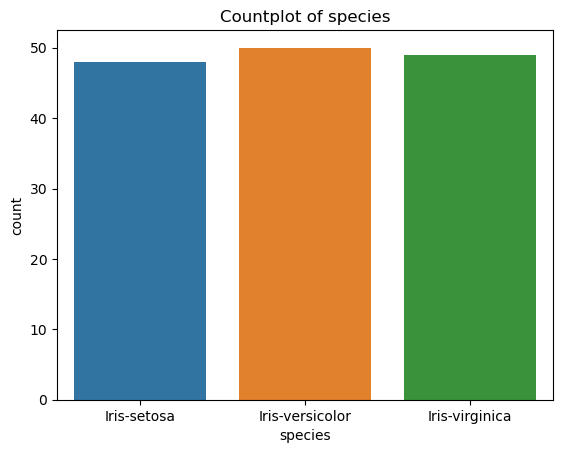

In [20]:
sns.countplot(x=df['species'])
plt.title('Countplot of species')   
plt.show() 

### Inference
1) According to the data Iris-versicolor has more count

### Seprating Num columns and Cat columns

In [21]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['species'], dtype='object')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


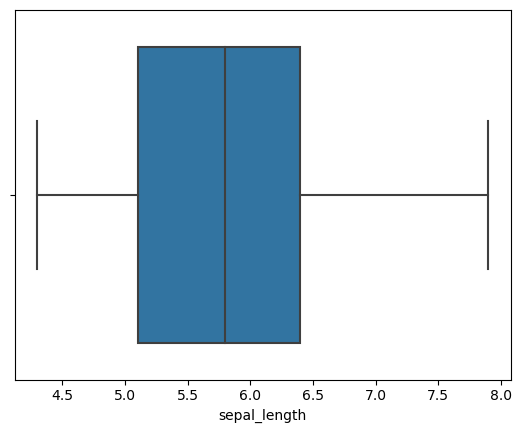

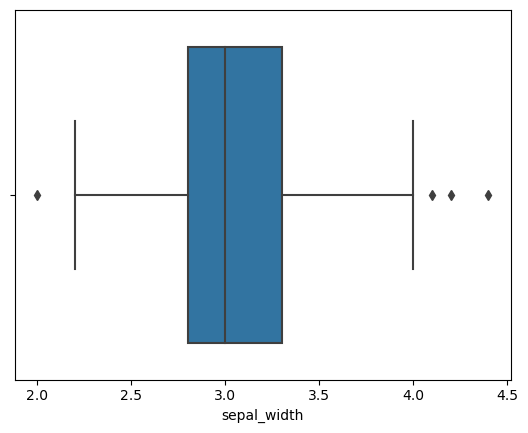

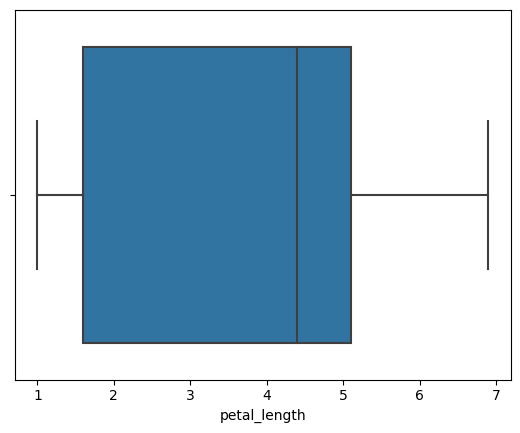

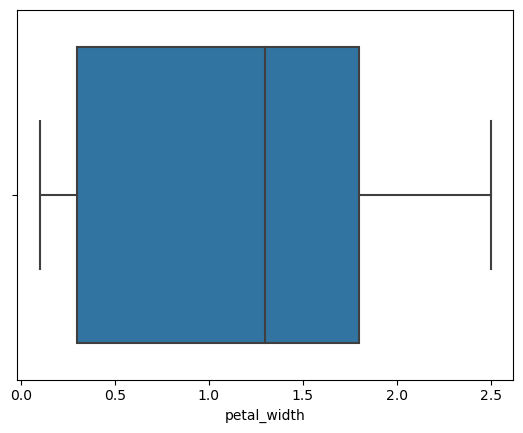

In [25]:
for i in num_cols:
    sns.boxplot(x = df[i])
    plt.show()

#### Inference
1) According the data there are little outliers in sepal_width

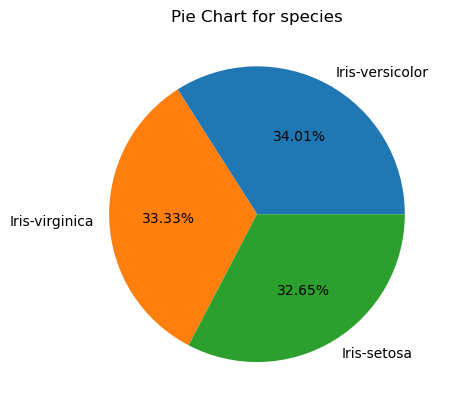

In [29]:
for i in cat_cols:
    plt.title(f'Pie Chart for {i}')
    x = df[i].value_counts()
    plt.pie(x.values, labels = x.index,autopct="%.2f%%")
    plt.show()

#### Inference
1) According to the data Iris-versicolor has more count

### Correlation

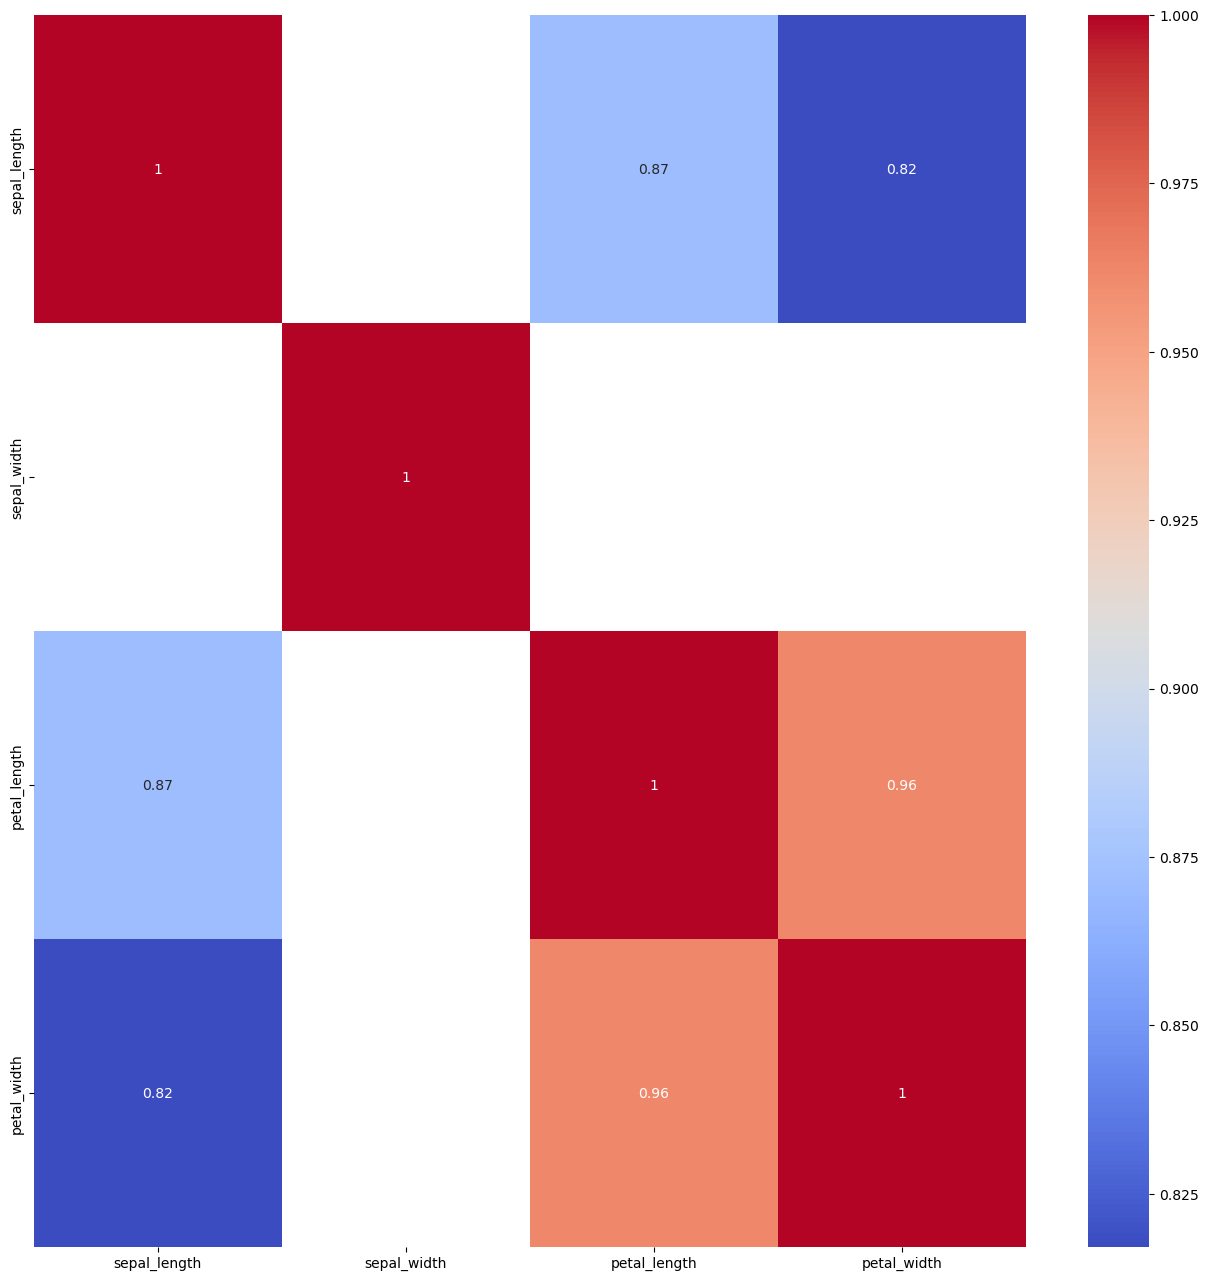

In [32]:
corr = df.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='coolwarm')
plt.show()

### Inference
1) There are features which are highly correlated like petal_length and sepal_length  <br>
2) Petal_width and sepal_length  <br>

### Handling Outliers

In [33]:
df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
sepal_length,147.0,5.856463,0.829100,4.3,4.400,4.4,4.538,4.60,5.8,7.27,7.432,7.662,7.700,7.700,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.200,2.2,2.300,2.33,3.0,3.80,3.816,3.900,4.008,4.154,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.146,1.2,1.300,1.30,4.4,6.10,6.132,6.362,6.608,6.700,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.100,0.1,0.200,0.20,1.3,2.30,2.316,2.400,2.408,2.500,2.5


#### Inference
1) There are minimul no. of outliers so here we are not treating it

### Select x and y

In [34]:
x = df.drop(['species'],axis=1)
y = df['species']
print(x.shape)
print(y.shape)

(147, 4)
(147,)


### Split data into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(102, 4)
(45, 4)
(102,)
(45,)


### Evaluating the Model

In [37]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train,y_train)
    test_acc = model.score(x_test,y_test)
    cm = confusion_matrix(y_test,ypred)
    cr = classification_report(y_test,ypred)
    res_df = pd.DataFrame({'Train_Acc':train_acc,'Test_Acc':test_acc},index=[mname])
    print('Confusion_Matrix\n',cm)
    print('Classification Report\n',cr)
    return res_df

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
lr1 = LogisticRegression(max_iter=100000)
lr_res = eval_model(lr1,x_train,y_train,x_test,y_test,'LogReg')

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [42]:
lr_res        # Highly overfit

,Train_Acc,Test_Acc
LogReg,0.990196,0.933333


### DT

In [43]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=12,min_samples_split=15)
dt_res = eval_model(dt,x_train,y_train,x_test,y_test,'DTree')
dt_res

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  0 16]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



,Train_Acc,Test_Acc
DTree,0.980392,0.977778


### RF

In [44]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=12,min_samples_split=15)
rf_res = eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



,Train_Acc,Test_Acc
Random Forest,0.980392,0.955556


### Knn

In [46]:
knn = KNeighborsClassifier(n_neighbors=15)
knn_res = eval_model(knn,x_train,y_train,x_test,y_test,'KNN')

Confusion_Matrix
 [[17  0  0]
 [ 0 11  1]
 [ 0  1 15]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [47]:
knn_res

,Train_Acc,Test_Acc
KNN,0.970588,0.955556


### Concating all models

In [49]:
all_res = pd.concat([lr_res,knn_res,dt_res,rf_res])
all_res

,Train_Acc,Test_Acc
LogReg,0.990196,0.933333
KNN,0.970588,0.955556
DTree,0.980392,0.977778
Random Forest,0.980392,0.955556


### Inference 
According to the result Decision Tree Model is performing best

In [61]:
ypred_dt =  dt.predict(x_test)

In [68]:
res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':ypred_dt})        # showing actual and prediction
res_df.head(20)

,Actual_y_test,Pred
127,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
140,Iris-virginica,Iris-virginica
19,Iris-setosa,Iris-setosa
106,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
78,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
83,Iris-versicolor,Iris-virginica
9,Iris-setosa,Iris-setosa


## Summary

This is how using Data Analysis and Machine Learning Algorithm, we have succesfully able to predict the variation of iris flowers.